Документация sklearn.preprocessing.StandardScaler. 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


Документация sklearn.preprocessing.MinMaxScaler. 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler

Статья «Standartization в Машинном обучении простыми словами».
https://zen.yandex.ru/media/id/5fd12882382a85570c79c48c/standartization-v-mashinnom-obuchenii-prostymi-slovami-601416037fd0a5390f576bff

# 8.1 Снижение размерности. Математическая задача.

<br>PCA (Principal Component Analysis) или метод главных компонент
(Карл Пирс в 1901 году)</br>
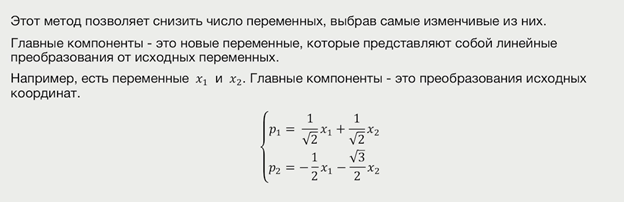
 
<br>Выбираем самые изменчивые переменные (которые содержат больше всего дисперсии)</br>
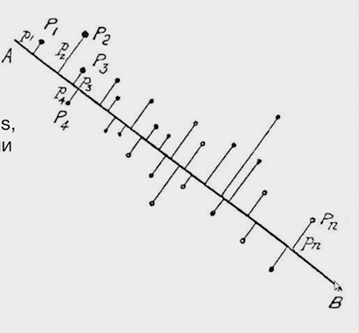

 
<br>Пирсон предложил формулу, которая по сути поворачивает систему координат, таким образом, чтобы новые оси совпадали с максимальным направлением дисперсии.</br>

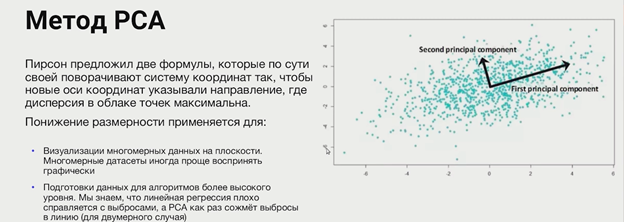
<br>Первая главная компонента соответствует «вытянутости», а вторая должны быть перпендикулярна к первой. Оба вектора должны забрать максимально много из дисперсии. Вторая забирает большую часть и уже оставшейся дисперсии.
Зачем всё это: 1) визуализация многомерных данных на плоскости. 2) подготовка данных для алгоритмов. Линейные классификаторы могут плохо отрабатывать во многомерном пространстве, потому что точки сильно перемешаны. PCA уберет шумы и позволит построить линейную регрессию.
</br>

# 8.2 Применение PCA

<br>Для любых данных. 

Алгоритм:
<br>1)	Визуализируем синтетические данные.</br>
<br>2)	Снижаем размерность sklearm.decomposition import PCA. Сжимаем размерность до размерности 1 (то есть с 2 до 1 в нашем случае).</br>
<br>Алгоритм сжимает данные с потерей информации.</br>
<br>Применение на практике:</br>
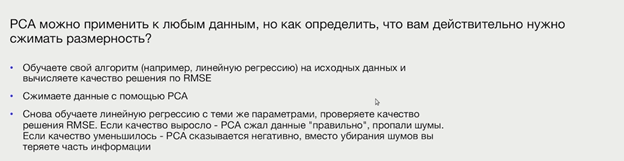

<br>Минусы:</br>
<br>Плохо работает когда данные разных маштабов. (количество минут, когда пользователь провел на сайте за всё время. И подписка. Нужно привести данные к одному маштабу (уже приводили задачу к одному маштабы в модуле линейной регресии)).</br>


# 8.4 Продвинутый уровень: реализация алгоритма PCA

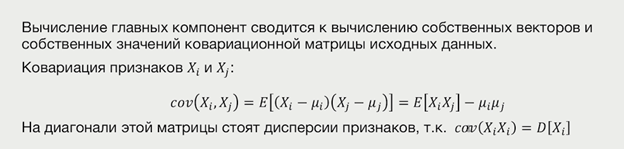
<br>Сначала центрируем данные</br>
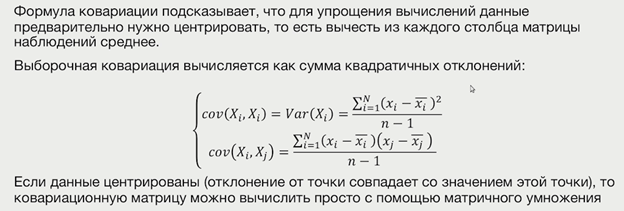
<br>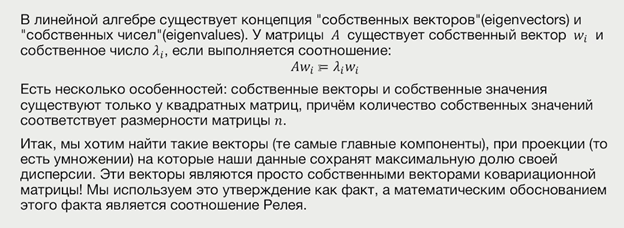</br>

# 8.5 SVD преобразование

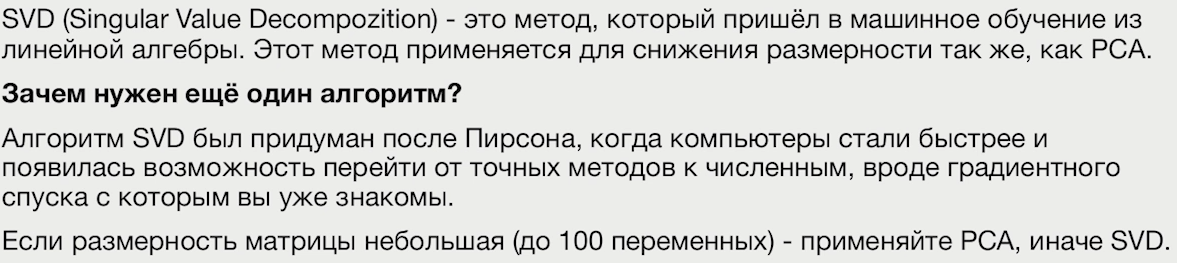
<br>SVD (Singular Value Decompozition). Основан на итерациях</br>
<br>меньше 100 фичей - PCA. Больше 100 фичей - SVD.</br>
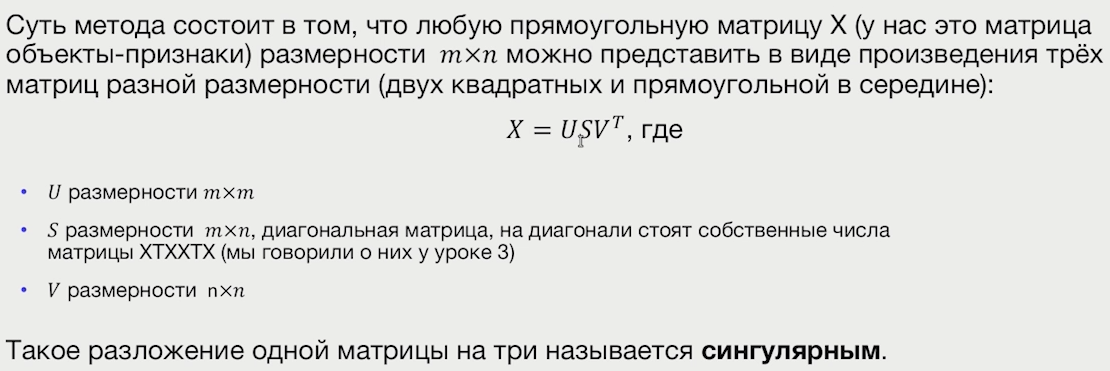
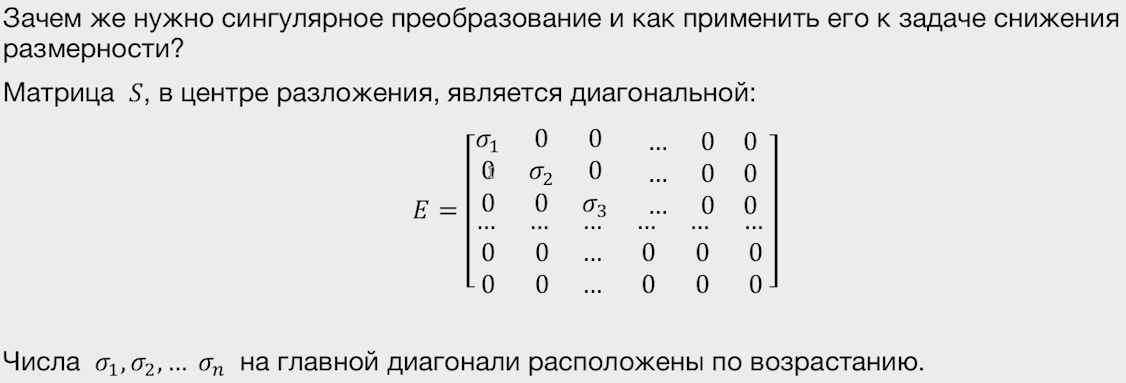
<br>снизить количество фичей - используем SVD. Если нужно избавиться от кореляции - PCA (SVD мало поможет)</br>

самоисправляеется на следующем шаге. сходится при симметрически определенности

# 8.7 Трансформация t-SNE

Два предыдущиъ метода являются классическими, для снижения размерности. Этот хорошо работает. Если SVD, PCA (линейная регрессия хорошо работает на данных),то всё нормально) (PCA, SVD улавливают линейные связи внутри наших переменных). На этот случай как раз и придуман t-SNE (t-distributed stochastic neighbor embedding). Позволяет улавливания зависимостей между данными. Требует тонкой настройки. <10.000 - t-SNE. Иначе PCA, SVD более устойчивы и имеют хорошие реализации для больших данных

# 9.1 Boosting

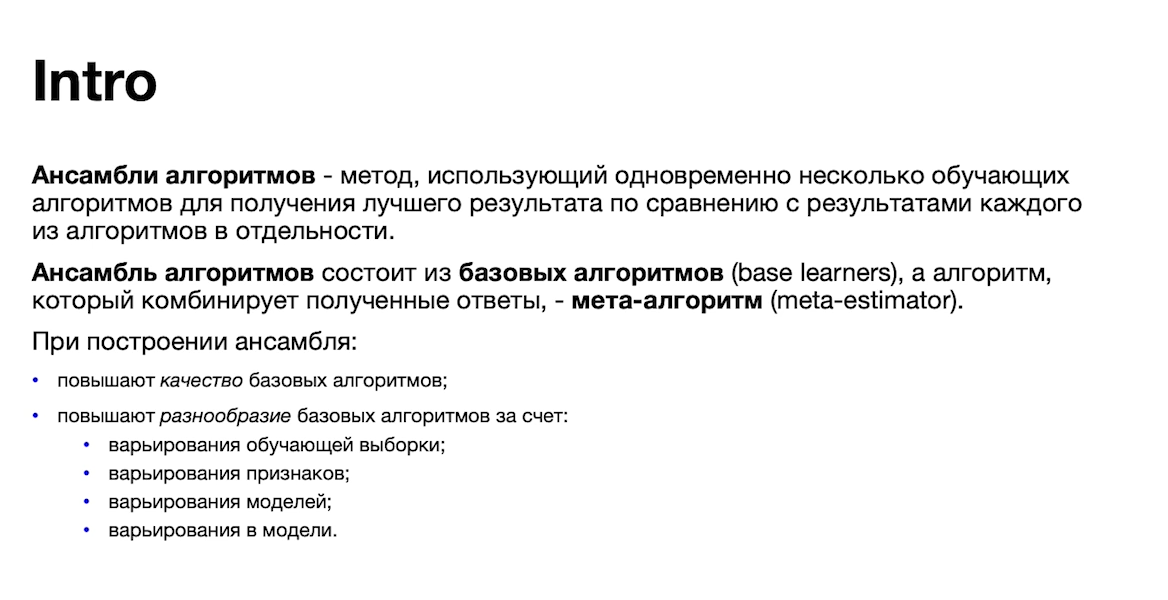
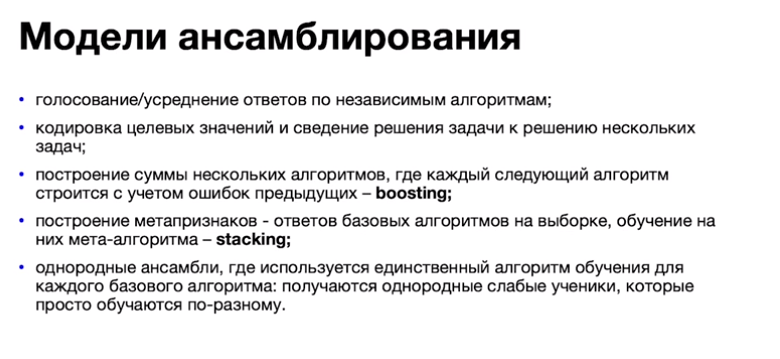
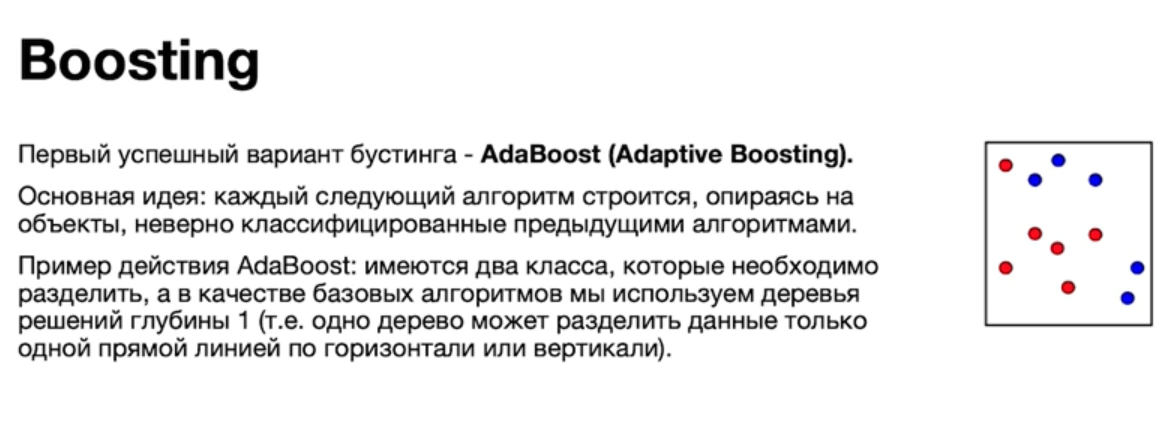
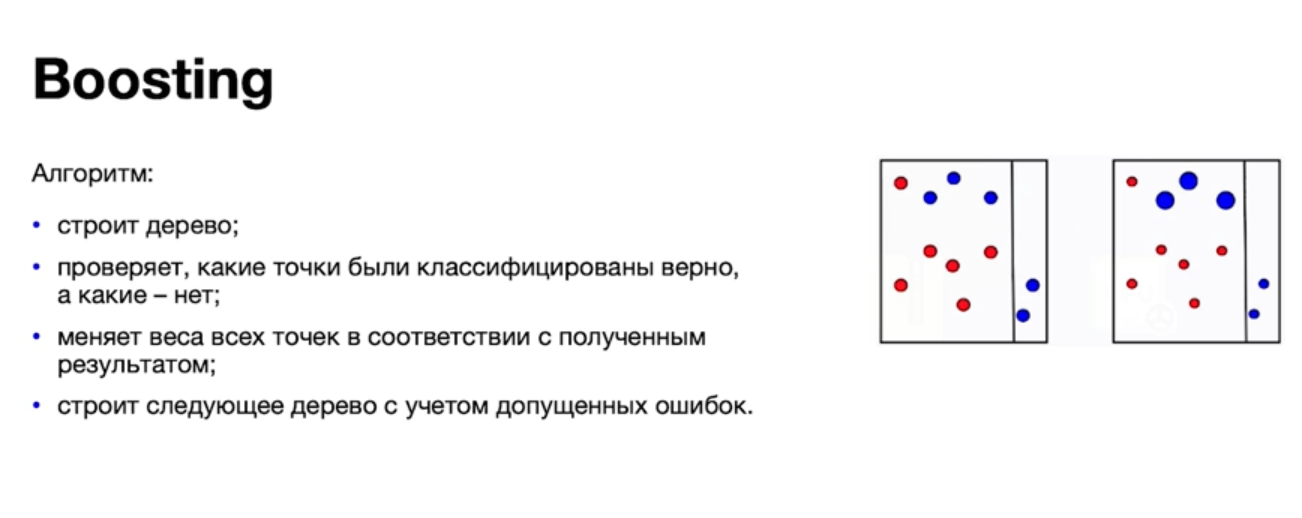
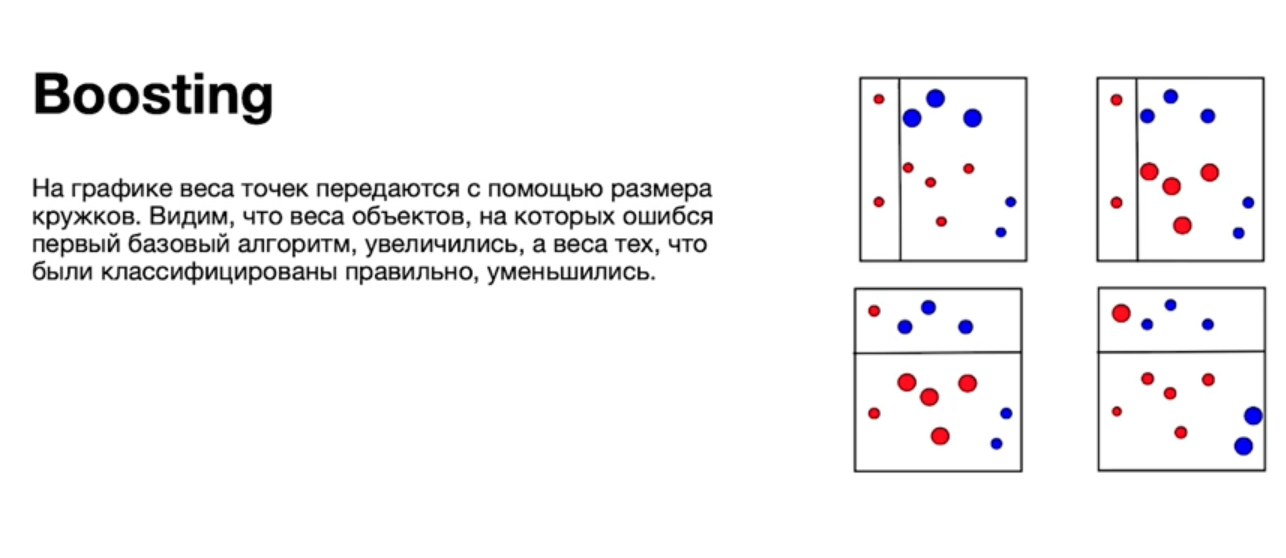
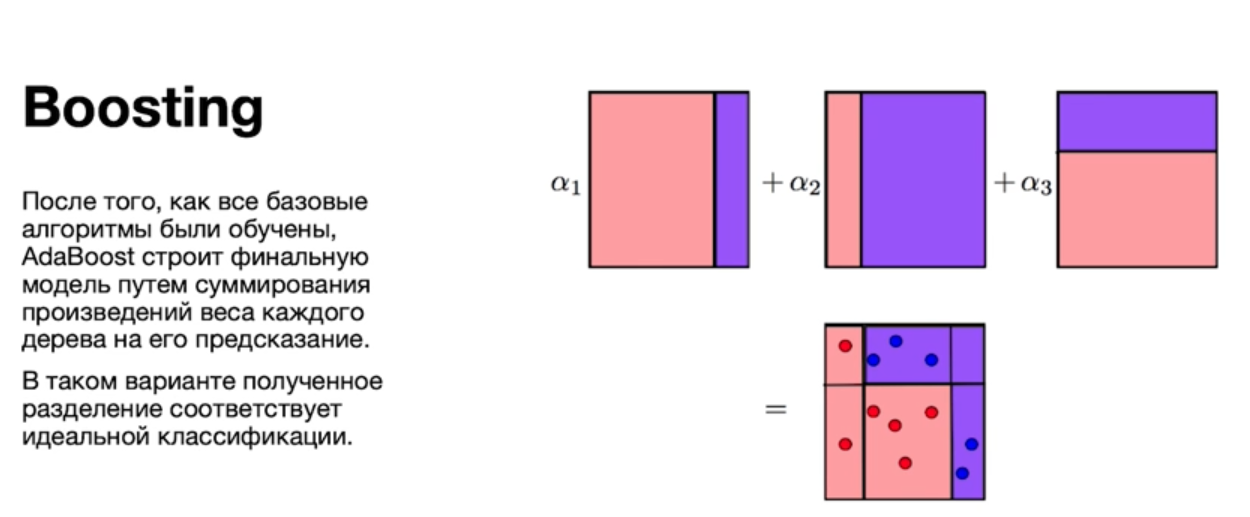

# 9.2 Gradient Boosting и XGBoost

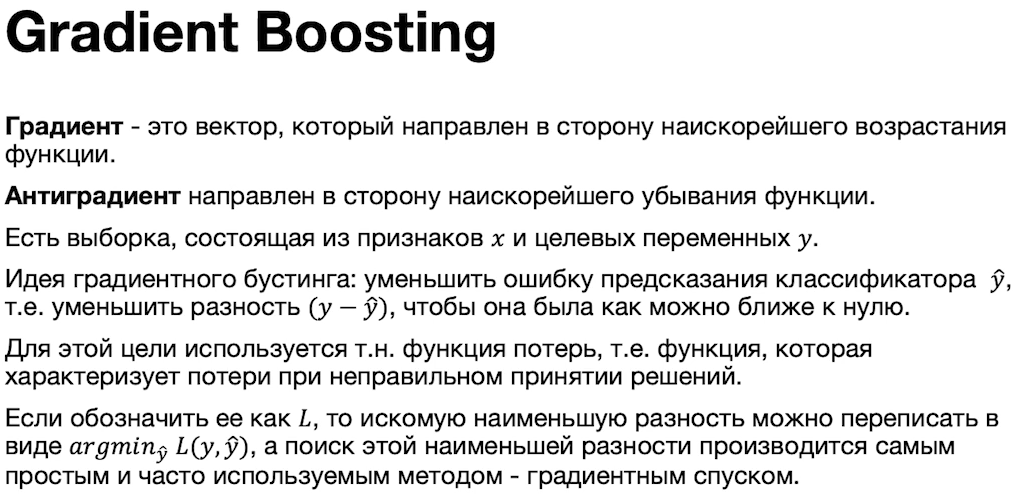
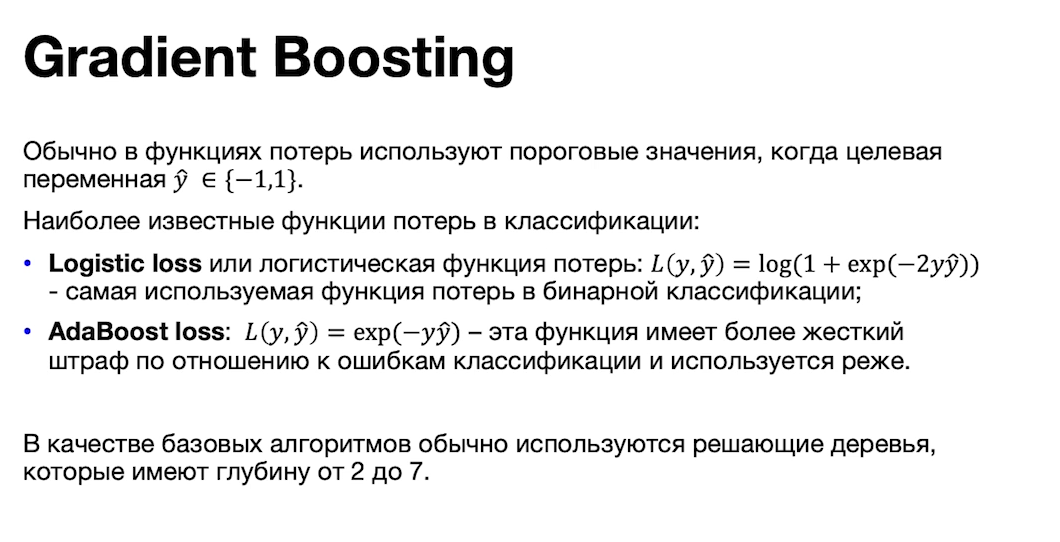
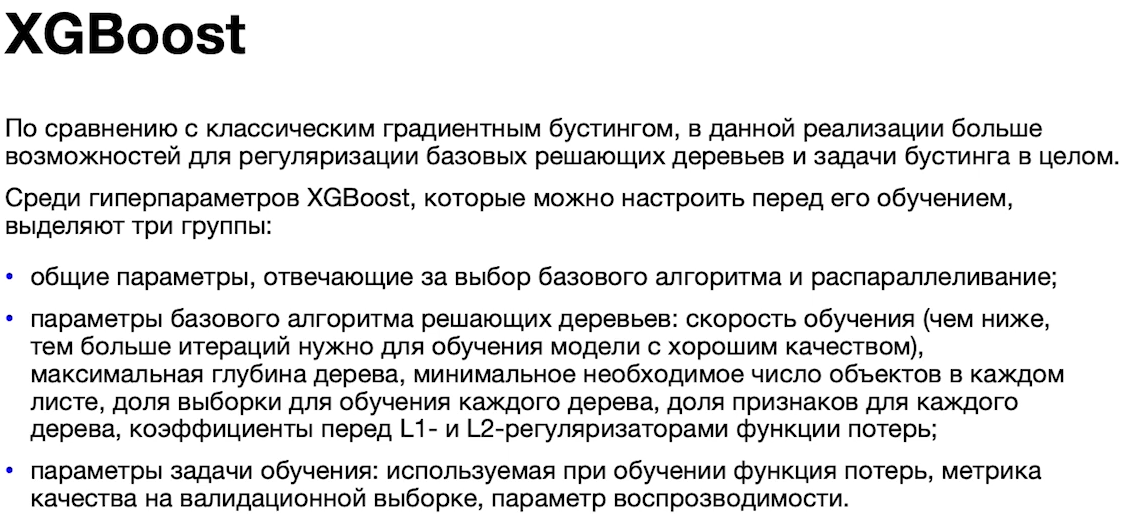

# 9.5 Stacking. Часть 1

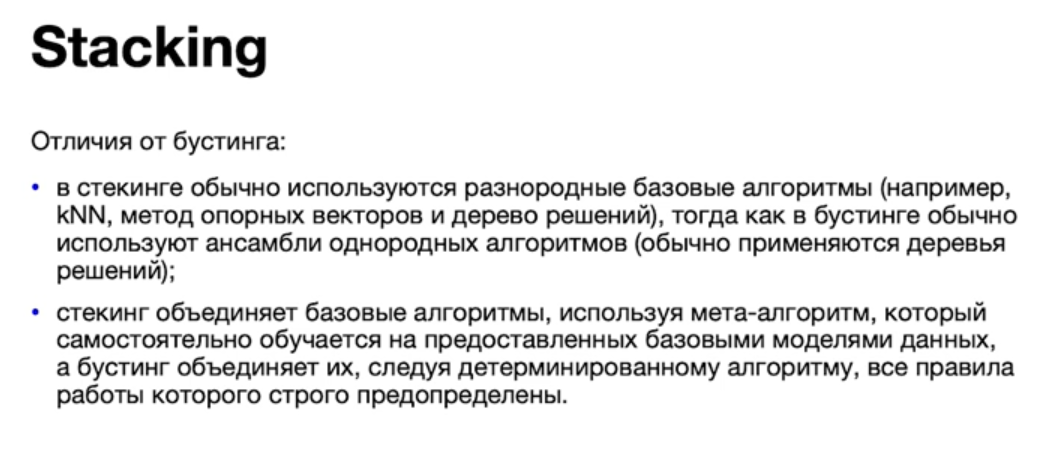
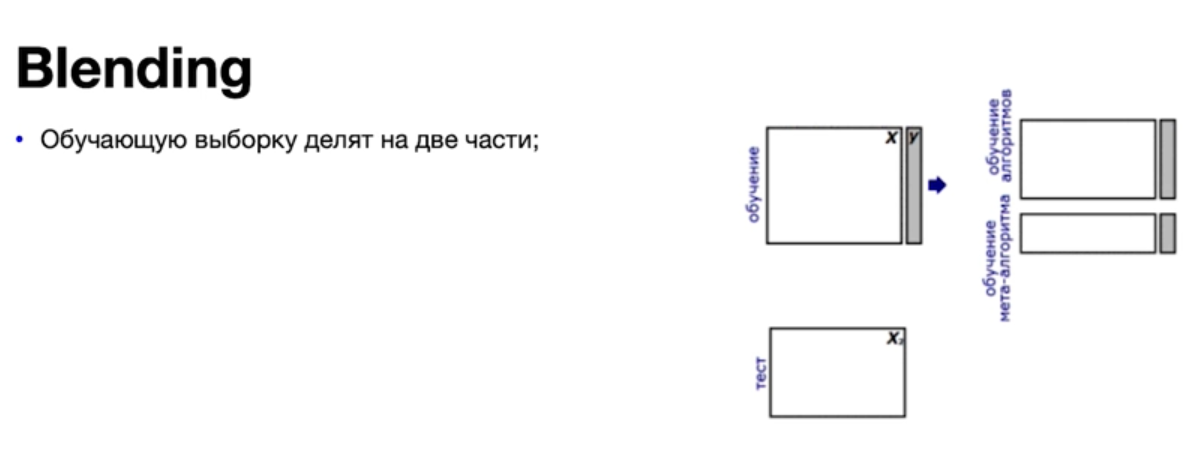
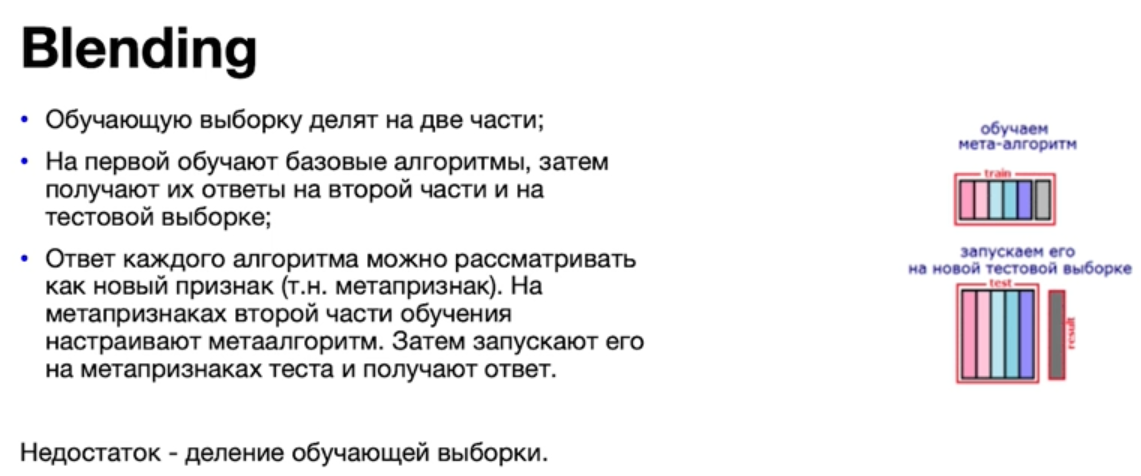
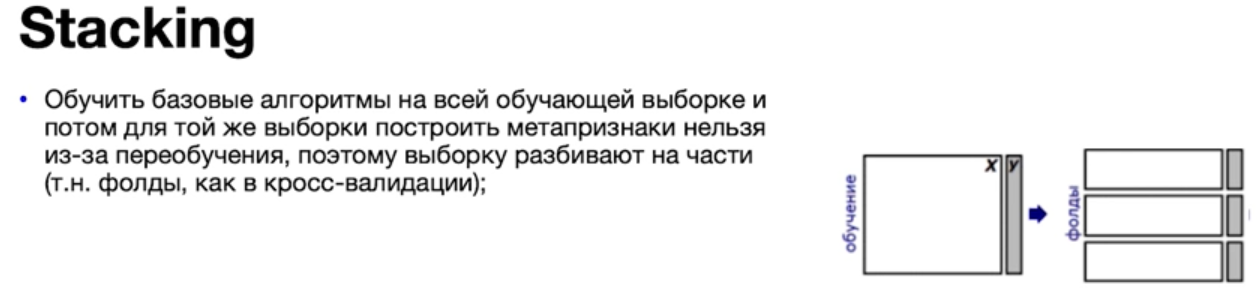
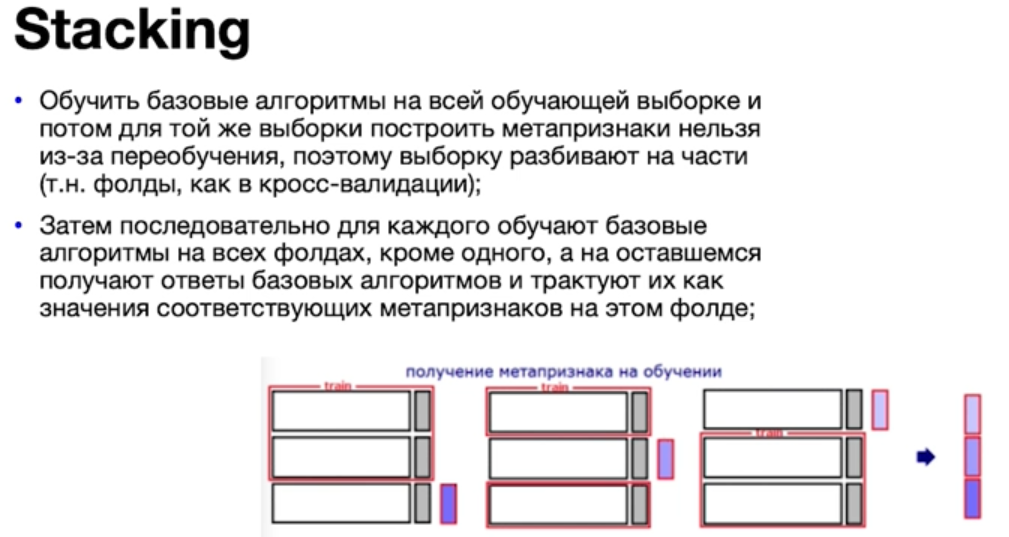
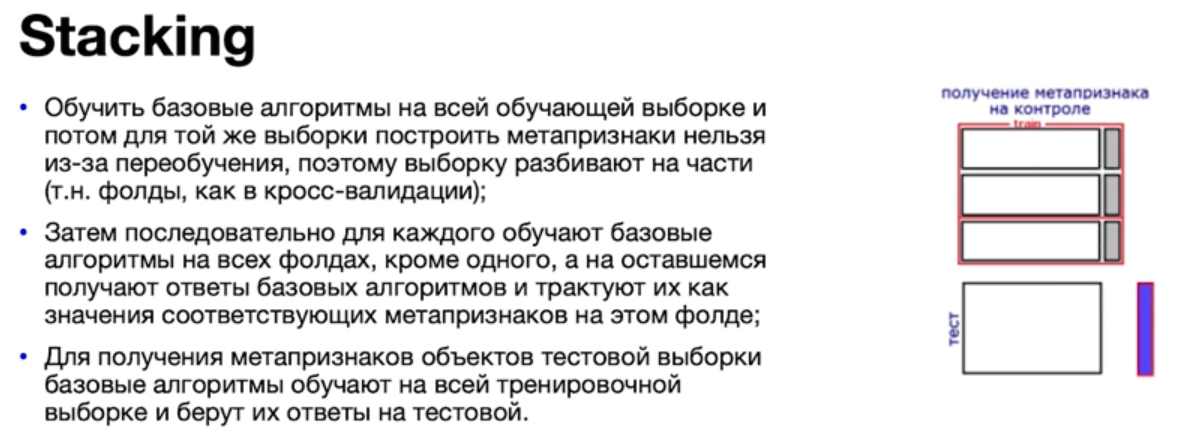
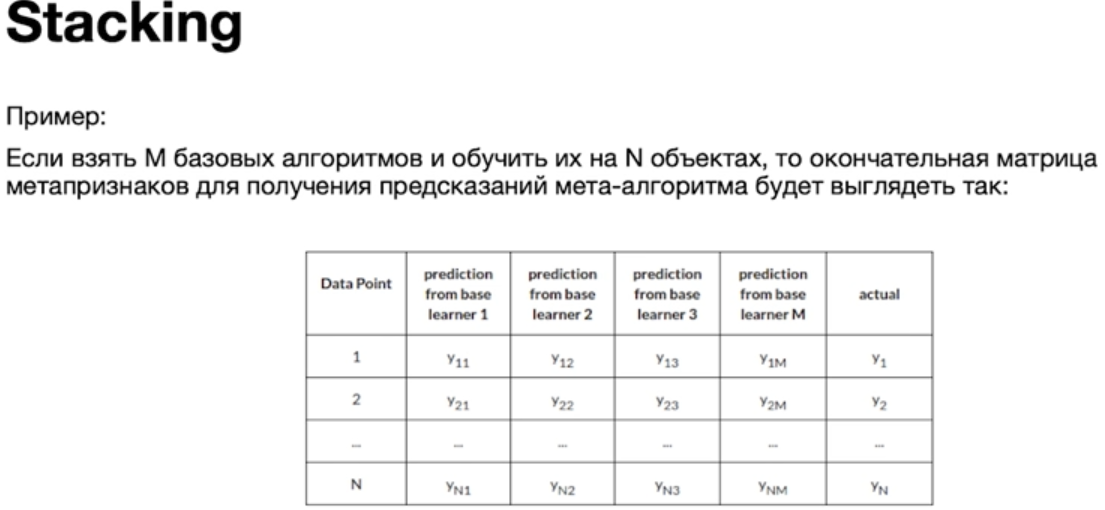
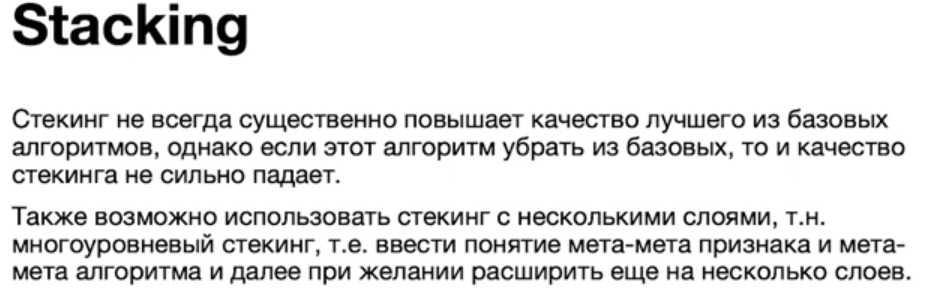

# Упоминания


<br>Снижение размерности</br>
	<br>PCA (пришел из статистики)</br>
	<br>Ковариация, математическое ожидание, дисперсия, собственные значения, собственные вектора, собственные числа, теорема соотношение Релея, собственные вектора, ковариационная матрица.</br>
    <br>SVD</br>
    <br>сингулярное преобразование</br>
    <br>t-SNE</br>
<br>AdaBoost loss</br>
<br>Logistic loss</br>
<br>Adaboost, GradientBoosting, XGBoost</br>

<br>Stacking, Blending</br>

# ПРАКТИКА

PCA, Алгоритм К-средних, Gradient Boosting, XGBoost

In [1]:
import time
import numpy as np
import os
import face_recognition
import cv2
import numpy as np
import math
from IPython.display import clear_output

import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh


def convert_landmark2array(landmark, w, h):
    return np.array([landmark.x * w, landmark.y * h, landmark.z * w])

def calculate_xyz(face_landmarks, w, h):
    left_temple = convert_landmark2array(face_landmarks.landmark[93], w, h)
    right_temple = convert_landmark2array(face_landmarks.landmark[454], w, h)

    forehead = convert_landmark2array(face_landmarks.landmark[10], w, h)
    chin = convert_landmark2array(face_landmarks.landmark[152], w, h)
    z = np.mean([np.linalg.norm(left_temple - right_temple),
                 np.linalg.norm(forehead - chin)])
    x = np.mean([left_temple[0], right_temple[0], forehead[0], chin[0]])
    y = np.mean([left_temple[1], right_temple[1], forehead[1], chin[1]])
    return x, y, z




def mean(x, x_old, coef=0.5):
    return coef * x + (1-coef) * x_old


def add_points_visualization(annotated_image, face_landmarks, with_numbers=False):
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections = mp_face_mesh.FACEMESH_TESSELATION,
        #connections=mp_face_mesh.FACE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    
    if with_numbers:
        h, w = image.shape[0], image.shape[1]
        for i, landmark in enumerate(face_landmarks.landmark):
            cv2.putText(annotated_image, str(i), (int(landmark.x * w), int(landmark.y * h)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255))


def add_depth_visualization(annotated_image, depth):
    cv2.putText(annotated_image,
                str(depth), 
                (10, 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.4, 
                (255,255,255))
    

def update_coords_file(x, y, z, w, h):
    aspect_ratio = w / h
    path = 'C:/Users/79227/Desktop'
    with open(path+'/camera_coords_tmp.txt', 'w') as camera_coords_file:
        z = -144. / z
        x = (x-w/2.) / w * z * 1.5
        y = (y-h/2.) / w * z * 1.5  # 144 and 1.5 where physically adjusted

        clear_output(wait=True)
        print(f'x: {x:0.3f} | y: {y:0.3f} | z: {z:0.3f}')

        camera_coords_file.write(f'{x} {y} {z}')
    
    #пришлось удалить записи
    #os.rename(path+'/camera_coords_tmp.txt', path+'/camera_coords.txt')


z_old, x_old, y_old = 0., 0., 0.

cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
        static_image_mode=False,
        max_num_faces=1,
        min_detection_confidence=0.2,
        min_tracking_confidence=0.2) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print('Ignoring empty camera frame')
            continue
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.multi_face_landmarks:
            pass
            cv2.imshow('asdad', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
        else:
            annotated_image = image.copy()
            face_landmarks = results.multi_face_landmarks[0]

            h, w = image.shape[0], image.shape[1]
            x, y, z = calculate_xyz(face_landmarks, w, h)
            
            z = mean(z, z_old, coef=0.9)
            x = mean(x, x_old)
            y = mean(y, y_old)
            z_old = z
            x_old = x
            y_old = y
            
            update_coords_file(x, y, z, w, h)

            add_points_visualization(annotated_image, face_landmarks, with_numbers=False)
            add_depth_visualization(annotated_image, z)
            cv2.imshow('asdad', annotated_image)
            if cv2.waitKey(5) & 0xFF == 27:
                break

x: 0.089 | y: -0.062 | z: -0.648


KeyboardInterrupt: 

In [2]:
cap.release()